In [19]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import timm

import random


import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torch.optim import lr_scheduler

import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision.transforms import v2

In [20]:
from mlops_lukianenko import dataset
from mlops_lukianenko import features

In [21]:
# Использование GPU по желанию

if torch.cuda.is_available():
  device = torch.device('cuda')
  print('Работаем на GPU')
else:
  device = torch.device('cpu')
  print('Работаем на CPU')


Работаем на GPU


In [22]:
data_dir = './dataset'

In [ ]:
# create_folder_structure(data_dir)

In [ ]:
# Параметры
classes = ["автомобиль", "мотоцикл", "автобус", "грузовик"]
num_images_per_class = 150

# Скачиваем изображения
for cls in classes:
    train_folder = os.path.join(data_dir, 'train', cls)
    dataset.download_images(cls, train_folder, num_images_per_class)

In [23]:
transform_pipeline = features.get_transforms_pipeline()

In [24]:
train_dataset, test_dataset = dataset.get_datasets(data_dir, transform_pipeline)

In [25]:
# Создаем DataLoader
train_loader, test_loader = features.get_loaders(train_dataset, test_dataset)

In [26]:
print("Данные разделены и подготовлены.")

Данные разделены и подготовлены.


In [27]:
from mlops_lukianenko import plots

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.9254032].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.3262744].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5005665].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping inp

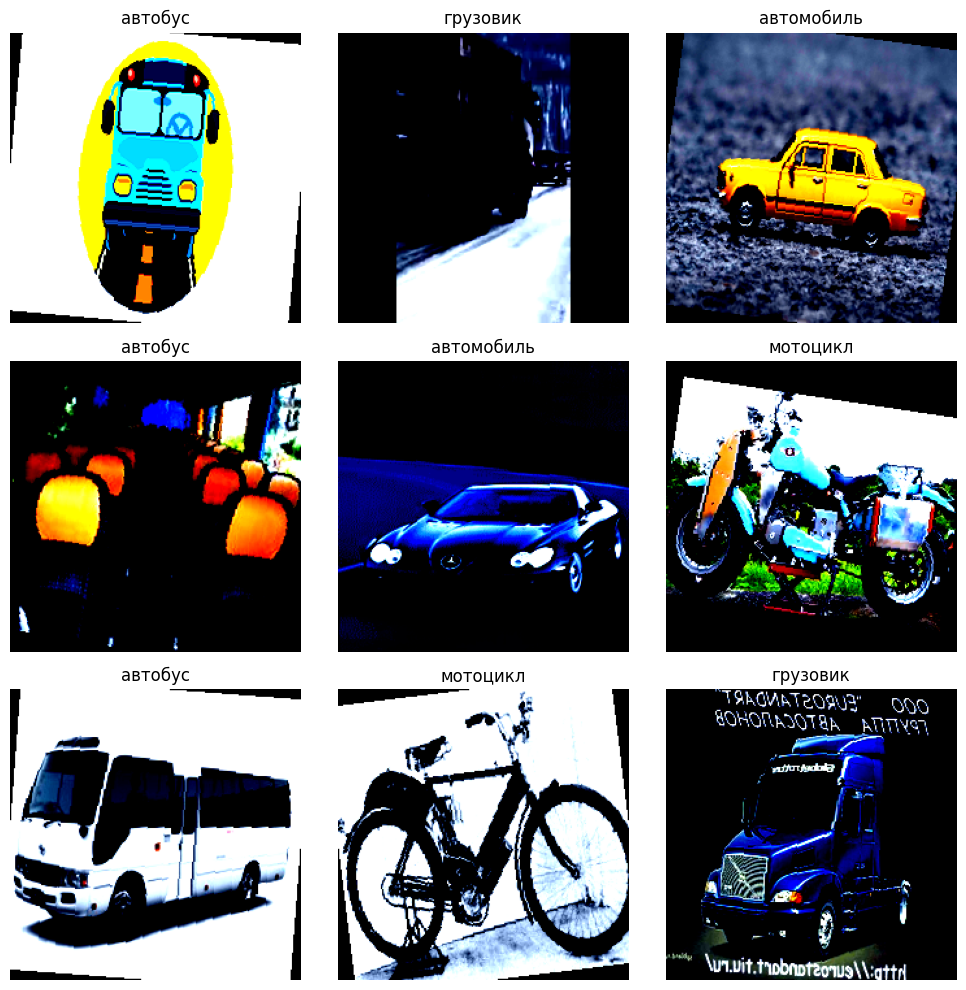

In [28]:
plots.show_random_classes(train_dataset,3)

In [29]:
model_name = "resnet50"  # Выбранная модель
pretrained_model = timm.create_model(model_name, pretrained=True)

In [30]:
from mlops_lukianenko.modeling import train

In [31]:

train.freeze_params(pretrained_model)

In [32]:
classes = ["автомобиль", "мотоцикл", "автобус", "грузовик"]
# Замена "головы" модели
num_classes = len(classes)  # Количество классов в задаче классификации
train.swap_head(pretrained_model, num_classes)


In [33]:
print("Модель подготовлена.")

Модель подготовлена.


In [34]:
# Подготовка для обучения
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(pretrained_model.parameters(), lr=0.001)

In [35]:
# Добавляем планировщик скорости обучения
scheduler = lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)  # Каждые 3 эпохи lr уменьшается в 10 раз

In [36]:
pretrained_model = pretrained_model.to(device)
# Параметры обучени
num_epochs = 10

In [37]:
train.train_freezed(pretrained_model, num_epochs, train_loader, test_loader, device, loss_fn, optimizer, scheduler)

Freezed training Epoch 1/10


C:\workV\.Maga\3sem\RO\LAB5\MLOps\mlops\.venv\lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Freezed training Training loss: 1.2364254593849182
Test Accuracy: 74.00%
Freezed training Epoch 2/10
Freezed training Training loss: 0.8469655895233155
Test Accuracy: 74.00%
Freezed training Epoch 3/10
Freezed training Training loss: 0.6325651717185974
Test Accuracy: 79.00%
Freezed training Epoch 4/10
Freezed training Training loss: 0.5525526070594787
Test Accuracy: 82.00%
Freezed training Epoch 5/10
Freezed training Training loss: 0.5100901484489441
Test Accuracy: 76.00%
Freezed training Epoch 6/10
Freezed training Training loss: 0.5323622107505799
Test Accuracy: 79.00%
Freezed training Epoch 7/10
Freezed training Training loss: 0.47975212514400484
Test Accuracy: 78.00%
Freezed training Epoch 8/10
Freezed training Training loss: 0.5114589512348175
Test Accuracy: 73.00%
Freezed training Epoch 9/10
Freezed training Training loss: 0.50931046128273
Test Accuracy: 82.00%
Freezed training Epoch 10/10
Freezed training Training loss: 0.513395653963089
Test Accuracy: 82.00%


In [38]:
train.unfreeze(pretrained_model)

In [ ]:
num_epochs=5
train.train_fine_tune(num_epochs, pretrained_model, train_loader, test_loader, device, loss_fn, optimizer, scheduler)

Fine-Tuning Epoch 1/5
Fine-Tuning Training loss: 0.5030112439393997
Test Accuracy: 80.00%
Fine-Tuning Epoch 2/5
Fine-Tuning Training loss: 0.501936816573143
Test Accuracy: 78.00%
Fine-Tuning Epoch 3/5
Fine-Tuning Training loss: 0.5368602192401886
Test Accuracy: 77.00%
Fine-Tuning Epoch 4/5
Fine-Tuning Training loss: 0.4812137430906296
Test Accuracy: 76.00%
Fine-Tuning Epoch 5/5


In [ ]:
# plots.show_train_diagr()

In [ ]:
from mlops_lukianenko.modeling import predict

In [ ]:

# Путь к случайному изображению
random_image_path = './scale_1200.jpg' # Укажите путь к изображению

predict.predict(random_image_path, device, pretrained_model, train_dataset)